## Code submission

If you would like to use Jupyter (perhaps the easiest way, this replaces the old IJuliaNotebook), just submit the notebook file. Name it as p(Homework#).ipynb.  For instance, for homework 1, name it as p1.ipynb. I suggest everyone use the latest version of Julia (current stable version **v0.7.0**. Please **DO NOT** use v1.0.0 **unless you know what you are doing**).  

If you use MATLAB or Julia/Python (not the notebook), name your main program as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). 

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear.  

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

E-mail the codes above, and **any supporting files** for the homework to bCourses

You can **either** name it as

lastname_firstname_1.ipynb (if you **only** have a notebook file)

**or**

lastname_firstname_1.zip (if you have **more than one** files)

$$
\newcommand{\bvec}[1]{{\boldsymbol #1}}
\newcommand{\norm}[1]{{\lVert#1\rVert}}
\newcommand{\bra}[1]{{\langle#1\rvert}}
\newcommand{\ket}[1]{{\lvert#1\rangle}}
\newcommand{\RR}{\mathbb{R}}
$$

## Problem 1



1) Book Chap 1. HW4

2) Let $\norm{\bvec{n}}=1$ be a unit vector in $\RR^3$, and $\theta\in\RR$. Prove that

$$e^{i \theta \bvec{n}\cdot\bvec{\sigma}} = \cos(\theta) I + i \sin(\theta) \bvec{n}\cdot\bvec{\sigma}$$

1) 

Let $\lvert\Psi(t)\rangle=C_1(t) \lvert\uparrow\rangle + C_1(t) \lvert\downarrow \rangle$, then
$$
\left(
\begin{array}{c}
C_1'(t) \\
C_2'(t)
\end{array}
\right)=
-i\left(
\begin{array}{cc}
B/2 & \gamma \cos(\omega t) \\
\gamma \cos(\omega t) & -B/2
\end{array}
\right)\left(\begin{array}{c}
C_1(t) \\
C_2(t)
\end{array}
\right)
$$

The following result plots the resonant case ($\omega\approx B$).

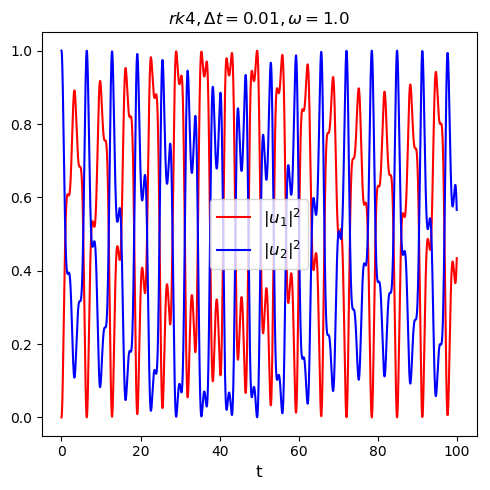

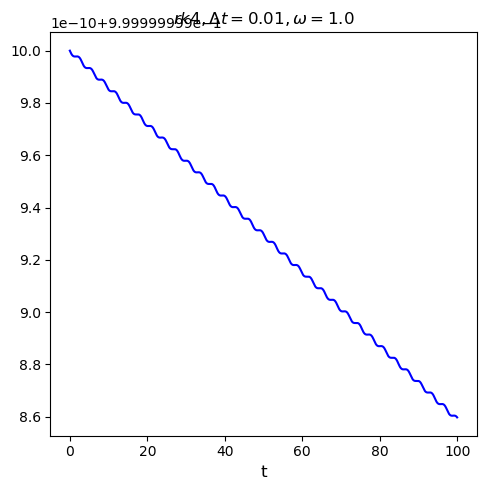

PyObject Text(0.5,1,'$rk4,\\Delta t=0.01,\\omega=1.0$')

In [43]:
using LinearAlgebra

function func(u,t,Omega,B,w)
    return [-im*(B/2.0*u[1]+Omega*cos.(w*t)*u[2]),
        -im*(-B/2.0*u[2]+Omega*cos.(w*t)*u[1])]
end

function rk4(N,T,u0,Omega,B,w)
    dt = T/N
    u = zeros(ComplexF64,2,N+1)
    t = collect(0:N)*dt
    u[:,1] = u0
    for i = 1 : N
        uc = vec(u[:,i])
        tc = t[i]
        k1 = func(uc,tc,Omega,B,w)
        k2 = func(uc+0.5*dt*k1,tc+0.5*dt,Omega,B,w)
        k3 = func(uc+0.5*dt*k2,tc+0.5*dt,Omega,B,w)
        k4 = func(uc+dt*k3,tc+dt,Omega,B,w)
        u[:,i+1] = uc + dt/6.0*(k1+2.0*k2+2.0*k3+k4)
    end
    return u
end



using PyPlot

##############################
T = 100
dt = 0.01
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
B = 1.0
w = 1.0
u0 = [0.0,1.0]

# RK4
u = rk4(N,T,u0,Omega,B,w)
figure(3,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2),"r-",label=L"|u_1|^2")
plot(t,vec(abs.(u[2,:]).^2),"b-",label=L"|u_2|^2")
xlabel("t")
legend()
title(L"rk4,\Delta t=0.01,\omega=1.0")
figure(4,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2+abs.(u[2,:]).^2),"b-",label=L"|u_1|^2+|u_2|^2")
xlabel("t")
title(L"rk4,\Delta t=0.01,\omega=1.0")

2) 

Method 1:

First prove $(\bvec{n} \cdot \bvec{\sigma})^2 = I.$  Then using Taylor expansion, 

$$e^{i \theta \bvec{n}\cdot\bvec{\sigma}} = I + i \theta \bvec{n}\cdot\bvec{\sigma} + \frac{1}{2!} (i \theta \bvec{n}\cdot\bvec{\sigma})^2 + \cdots  = (1-\frac{1}{2!}\theta^2+\cdots)I + i (\theta - \frac{1}{3!}\theta^3+\cdots)\bvec{n}\cdot\bvec{\sigma} =  \cos(\theta) I + i \sin(\theta) \bvec{n}\cdot\bvec{\sigma}.$$

Method 2:

Compute 

$$\frac{d^2}{d\theta^2} e^{i \theta \bvec{n}\cdot\bvec{\sigma}} = -e^{i \theta \bvec{n}\cdot\bvec{\sigma}}.$$

So 

$$e^{i \theta \bvec{n}\cdot\bvec{\sigma}} = C_1 \cos(\theta) + C_2 \sin(\theta).$$

Then we prove the statement by noting the initial condition

$$e^{i \theta \bvec{n}\cdot\bvec{\sigma}}\Big\vert_{\theta=0} = I, \quad \frac{d}{d\theta}e^{i \theta \bvec{n}\cdot\bvec{\sigma}}\Big\vert_{\theta=0} = i \bvec{n}\cdot\bvec{\sigma}$$.

## Problem 2

The one dimensional quantum Ising model with the transverse magnetic field has the following Hamiltonian

$$\hat{H} = -\sum_{j=1}^{N-1} \sigma_j^z \sigma_{j+1}^z - g \sum_{j=1}^N \sigma_j^x.$$ 

Here the spin operator 

$$\sigma_j^z = I \otimes \cdots \otimes I\otimes  \sigma^z \otimes I\otimes \cdots \otimes I$$

where $\sigma^z$ appears at the $j$-th position.  $\sigma_j^x,\sigma_j^y$ are defined similarly.

For $N=4$, write a code to express $\hat{H}$ as a matrix. Find the ground state energy with respect to $g\in [-1,1]$.

**Hint**: In the row-major ordering (i.e. the last index is looped over first), the *matricized* representation of $A\otimes B$ can be implemented as a matrix using  `kron(A,B)`. Similarly $A\otimes B \otimes C$ can be implemented as `kron(A,kron(B,C))`.

In [65]:
# Poor man's implementation without using sparse matrices
using LinearAlgebra

σ_x = [0 1;1 0]; σ_y=[0 -im;im 0]; σ_z=[1 0; 0 -1]; e2 = [1 0; 0 1];

N = 4

iden_op = Array{Any,1}(undef,N)
sigma_op = Array{Any,2}(undef,N,3)

for i = 1 : N
    iden_op[i] = Matrix(1.0I,2^i,2^i)
end

sigma_op[1,1] = kron(σ_x,iden_op[N-1])
sigma_op[1,2] = kron(σ_y,iden_op[N-1])
sigma_op[1,3] = kron(σ_z,iden_op[N-1])

for i = 2 : N-1
    sigma_op[i,1] = kron(iden_op[i-1],kron(σ_x,iden_op[N-i]))
    sigma_op[i,2] = kron(iden_op[i-1],kron(σ_y,iden_op[N-i]))
    sigma_op[i,3] = kron(iden_op[i-1],kron(σ_z,iden_op[N-i]))
end

sigma_op[N,1] = kron(iden_op[N-1],σ_x)
sigma_op[N,2] = kron(iden_op[N-1],σ_y)
sigma_op[N,3] = kron(iden_op[N-1],σ_z)


function Ham_spin(N,g)
    H = zeros(2^N,2^N)
    for i = 1 : N-1
        H = H - sigma_op[i,3] * sigma_op[i+1,3]
    end
    for i = 1 : N
        H = H - g * sigma_op[i,1]
    end
    return H
end

Ham (generic function with 1 method)

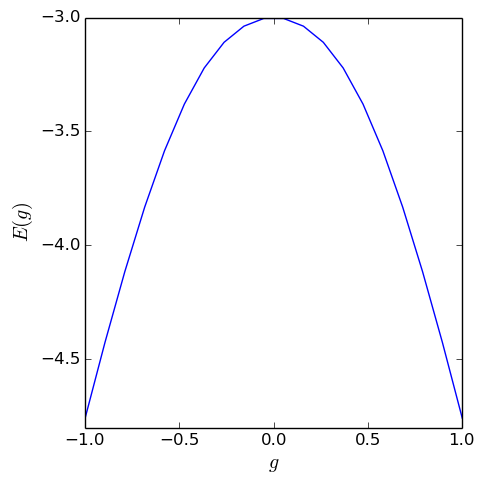

PyObject <matplotlib.text.Text object at 0x7f6e54afb610>

In [66]:
Npoint = 20
g_vec = LinRange(-1.0,1.0,Npoint)
energy_vec = zeros(Npoint)

for l = 1 : Npoint
    H = Ham_spin(N,g_vec[l])
    energy_vec[l] = eigvals(H)[1]
end

using PyPlot

figure(1,figsize=(5,5))
plot(g_vec,energy_vec)
xlabel(L"g")
ylabel(L"E(g)")


## Problem 3

Define the matrix

$$ A = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}, \quad A^{\dagger} = \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix}.$$

1) Write $A,A^{\dagger}$ using linear combinations of Pauli matrices.

For an $N$-site system, the creation operator is defined as

$$c_j^{\dagger} = \sigma_z\otimes\cdots \otimes \sigma_z \otimes A^{\dagger} \otimes I\otimes \cdots\otimes I.$$

The annihilation operator is defined as

$$c_j = \sigma_z\otimes\cdots \otimes \sigma_z \otimes A \otimes I\otimes \cdots\otimes I.$$

Here $A^{\dagger},A$ appear in the $j$-th position, respectively.  

2) For $N=2$, consider the following Hamiltonian

$$\hat{H} = -c_1^{\dagger} c_2 - c_2^{\dagger} c_1$$

Compute its ground state energy.  Verify that this is the smallest eigenvalue of the matrix

$$h = \begin{bmatrix} 0 & -1 \\ -1 & 0 \end{bmatrix}$$

**Think**: Does the dimension of $\hat{H}$ and $h$ even match?

3) Consider the following Hubbard model

$$\hat{H} = -c_1^{\dagger} c_3 -c_3^{\dagger} c_1 - c_2^{\dagger} c_4 -c_4^{\dagger} c_2 + U c_1^{\dagger} c_1 c_2^{\dagger} c_2 + U c_3^{\dagger} c_3 c_4^{\dagger} c_4$$

Plot the ground state energy as a function of $U\in [0,5]$.

In [40]:
using LinearAlgebra

σ_x = [0 1;1 0]; σ_y=[0 -im;im 0]; σ_z=[1 0; 0 -1]; e2 = [1 0; 0 1]; a2 = [0 1;0 0]

N = 2

iden_op = Array{Any,1}(undef,N)
sgn_op  = Array{Any,1}(undef,N)

iden_op[1] = e2
sgn_op[1]  = σ_z
for i = 2 : N
    iden_op[i] = kron(e2,iden_op[i-1])
    sgn_op[i] = kron(σ_z,sgn_op[i-1])
end

cre_op = Array{Any,1}(undef,N)
ann_op = Array{Any,1}(undef,N)

cre_op[1] = kron(a2',iden_op[N-1])
ann_op[1] = kron(a2,iden_op[N-1])

for i = 2 : N-1
    cre_op[i] = kron(sgn_op[i-1],kron(a2',iden_op[N-i]))
    ann_op[i] = kron(sgn_op[i-1],kron(a2, iden_op[N-i]))
end

cre_op[N] = kron(sgn_op[N-1],a2')
ann_op[N] = kron(sgn_op[N-1],a2)

H = -cre_op[1] * ann_op[2] - cre_op[2] * ann_op[1]
(D,V)=eigen(H)

display(H)
println("Eigenvalues of H = ", D)

4×4 Array{Int64,2}:
 0   0   0  0
 0   0  -1  0
 0  -1   0  0
 0   0   0  0

Eigenvalues of H = [-1.0, 0.0, 0.0, 1.0]


**Answer for think**: The matrix entries explains the answer immediately. But a deeper answer involves some knowledge of second quantization: For a quadratic Hamiltonian

$$\hat{H}=\sum_{i,j} c_i^{\dagger} c_j h_{ij},$$

its eigenvalues are **related** to the eigenvalues of the matrix $[h_{ij}]$, depending on the number of particles.

In this case, the Fock space is divided into three sectors depending on the number of particles $M$.  $M=0$ and $M=2$ corresponds to eigenvalue 0.  $M=1$ has dimension 2. The eigenvectors are $\frac{1}{\sqrt{2}}(c_1^{\dagger} \pm c_2^{\dagger}) |0\rangle$, with eigenvalues $-1,+1$ respectively. These simply correspond to the eigenvalues and eigenvectors of $h$.

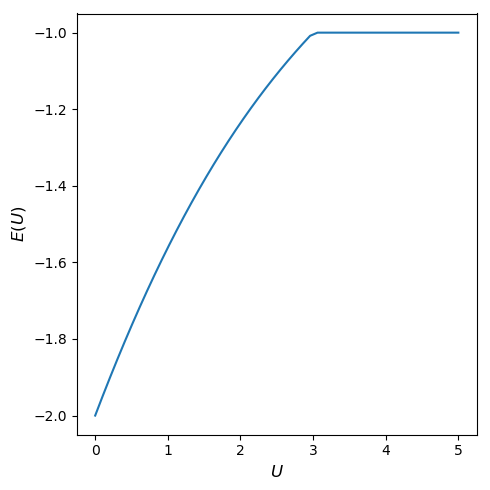

Eigenvalues of H = [-1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]


PyObject Text(28,0.5,'$E(U)$')

In [21]:
using LinearAlgebra

σ_x = [0 1;1 0]; σ_y=[0 -im;im 0]; σ_z=[1 0; 0 -1]; e2 = [1 0; 0 1]; a2 = [0 1;0 0]

N = 4

iden_op = Array{Any,1}(undef,N)
sgn_op  = Array{Any,1}(undef,N)

iden_op[1] = e2
sgn_op[1]  = σ_z
for i = 2 : N
    iden_op[i] = kron(e2,iden_op[i-1])
    sgn_op[i] = kron(σ_z,sgn_op[i-1])
end

cre_op = Array{Any,1}(undef,N)
ann_op = Array{Any,1}(undef,N)

cre_op[1] = kron(a2',iden_op[N-1])
ann_op[1] = kron(a2,iden_op[N-1])

for i = 2 : N-1
    cre_op[i] = kron(sgn_op[i-1],kron(a2',iden_op[N-i]))
    ann_op[i] = kron(sgn_op[i-1],kron(a2, iden_op[N-i]))
end

cre_op[N] = kron(sgn_op[N-1],a2')
ann_op[N] = kron(sgn_op[N-1],a2)

H = -cre_op[1] * ann_op[2] - cre_op[2] * ann_op[1]
(D,V)=eigen(H)

println("Eigenvalues of H = ", D)

function Ham_Hubbard(U)
    @assert N == 4
    H = zeros(2^N,2^N)
    H = H - cre_op[1] * ann_op[3] - cre_op[3] * ann_op[1] - cre_op[2] * ann_op[4] - cre_op[4] * ann_op[2]
    H = H + U * cre_op[1] * ann_op[1] * cre_op[2] * ann_op[2] + U * cre_op[3] * ann_op[3] * cre_op[4] * ann_op[4]
    return H
end

Npoint = 50
U_vec = LinRange(0,5.0,Npoint)
energy_vec = zeros(Npoint)

for l = 1 : Npoint
    H = Ham_Hubbard(U_vec[l])
    energy_vec[l] = eigvals(H)[1]
end

using PyPlot

figure(1,figsize=(5,5))
plot(U_vec,energy_vec)
xlabel(L"U")
ylabel(L"E(U)")